# Computational Laboratory 4CCP1300 Assessment

#### Module coordinator: George Booth (george.booth@kcl.ac.uk)

## Assessment information

In this jupyter notebook, you will find the guidelines and questions to be completed for the assignment for the computational modeling course. The assignment is due by **17**$^{th}$ **March 2023 at 12:00 (noon) GMT**, and must be submitted via Turnitin on KEATS. This means that you must download this completed jupyter notebook from CoCalc, save it locally, and then submit it via KEATS. You can download your completed jupyter notebook from CoCalc once completed via the `Files` tab, and then clicking on the 'cloud' download button on the right hand side. Remember that submitting at the last moment might put you at risk of unexpected events (failing internet connection or other problems), so plan your time, and aim to submit well BEFORE the deadline. A section on KEATS will be opened soon to allow for your online submissions there. Please note that the completed jupyter notebooks should be submitted directly (this file ending .ipynb), rather than a pdf or text document, so that the code can be run by the markers and checked for accuracy of the code. Submitted work will be checked for similarity of the submitted notebooks to other students - plagiarism will not be tolerated. Note that the basic similarity measure on TurnItIn will be high, due to the same questions in each notebook, and will just be used as a guide, so don't worry if this crude measure is high. 

This document will provide a set of three problems that you will need to solve by using the knowledge built up from the notebooks and exercises completed during the course. You can revisit previous notebooks to refresh your knowledge from the course. The various parts of the problems should be submitted in separate code cells under each subsection of the questions. These cells should generate the results, and will build on the work of previous cells. Furthermore, text cells should be included with discussion and more information about each question where required. Note that the code itself (Python cells) will be marked, so please follow good coding practices outlined in the lectures (appropriate comments in the code, and clean, consistent and well structured code, with output appropriately formatted for readability). Note that all cells should execute properly without error messages given, such that when you go in the menu to `'Kernel'` then `'Restart & Run All'`, all the appropriate output from the code cells will be generated for marking each of the questions. Finally, please fill out your name, k-number and email address below, as this is how your marks will be returned to you. Good Luck!



### Student Name: \[Yann Raphael Janssen\]

### k\-number: \[K21109226\]

### Email address: \[yann.janssen@kcl.ac.uk\]



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Problem 1: Molecular conformers

A molecular conformer is a particular shape or atomic arrangement that a molecule can adopt. Often molecules will flip between these two arrangements of their atoms. The aim in this problem is to model the changes in the numbers of molecules in different shapes (conformers) over a period of time. 

We assume that there are two conformers of a particular molecule which we want to model, conformer $A$ and conformer $B$, and the total number of molecules is fixed, so that $n_A + n_B$ remains the same. We assume that every hour, 20% of the current population of conformer $A$ will turn into conformer $B$. However, there is a chance of also transitioning in the other direction, and so each hour, 10% of the molecules in conformer $B$ turn back into conformer $A$. We assume that initially, there are 150 '$A$ molecules' and 150 '$B$ molecules'. We also assume that the changes in populations take place in discrete time intervals on the hour, each hour.

a) We can write the number of $A$-molecules ($n_A$) and $B$-molecules ($n_B$) as a vector each hour, $$ \begin{bmatrix} n_A \\ n_B \end{bmatrix}.$$ Furthermore, we can recast the problem of finding the vector from one hour to the next, as a single matrix equation, with a linear system of equations. By acting the initial vector of populations on a $2 \times 2$ matrix of fixed probabilities, indicating the proportion of molecules which transition between states or remain in the current state, you should be able to find the vector of populations in the second hour to be $n_A=135$ and $n_B=165$.

**Write a code cell below, to initialize a numpy array of the appropriate** $2 \times 2$ **matrix of probabilities assigned to the variable** **`P`****, and the vector of current** $A$ **and** $B$ **populations, assigned to the variable** **`pop`****, which should be initialized to** $(150, 150)$**. Calculate the matrix multiplication of** **`P`** **and the vector** **`pop`** **\(use the** **`numpy`** **module to help\), and therefore print out what the population of each type is after  hour \(which should be** $n_A = 135$ **and** $n_B=165$**\). Finally, have the code test whether the matrix** **`P`** **is a symmetric matrix or not, and print out a statement about this.** \[8 marks\]



In [50]:
#Initialize 2x2 Matrix
p = np.array([[0.8, 0.1],
              [0.2, 0.9]])
#Initialize population vector
pop = np.array([150,150])

#Calculate dot product between the matrix and the vector
NextPop = p.dot(pop)

#output next population
print(NextPop)
print("nA = ", NextPop[0])
print("nB = ", NextPop[1])

#check if matrix is symmetric
if p[0][1] == p[1][0]:
    print("symmetric.")
else:
    print("not symmetric.")

#it is not symmetric because it doesn't satisify the conditions for a symmetric matrix. Conditions being such that at least one entry with a nonzero imaginary part.

[135. 165.]
nA =  135.0
nB =  165.0
not symmetric.


b) We are particularly interested in what happens after a long time - are there a steady number of $A$- vs. $B$-molecules, or does one conformer win out? If it is a 'steady state' (when the populations settle down to a constant over time), then what are these steady populations? Note that the transition probabilities remain the same each hour, so we can use the same probability matrix, `P`, and use it to update the populations many times. 

**Set up a loop in the code cell below, to find out what the populations are 72 hours after the initial condition. Each iteration, also check that the total number of molecules ($n_A + n_B$) is conserved, and equal to the original number (300, to within reasonable numerical precision). Write out the final number of $A-$ and $B-$molecules. Is this a stable number, or does it change after another day?** [6 marks]



In [48]:
#Initialize variables
count = 0
p = np.array([[0.8, 0.1],
              [0.2, 0.9]])
pop = [150,150]

#while loop for 72 hours
while (count < 72):
    pop= np.dot(p,pop);
    count = count+1
    print ("loop ",count ,pop)
## The final number of A and B molecules reaches a stable state after around 11 loops where the ratio of A molecules to B molecules averages around 100(A molecules) to 200(B molecules)

loop  1 [135. 165.]
loop  2 [124.5 175.5]
loop  3 [117.15 182.85]
loop  4 [112.005 187.995]
loop  5 [108.4035 191.5965]
loop  6 [105.88245 194.11755]
loop  7 [104.117715 195.882285]
loop  8 [102.8824005 197.1175995]
loop  9 [102.01768035 197.98231965]
loop  10 [101.41237625 198.58762376]
loop  11 [100.98866337 199.01133663]
loop  12 [100.69206436 199.30793564]
loop  13 [100.48444505 199.51555495]
loop  14 [100.33911154 199.66088846]
loop  15 [100.23737808 199.76262192]
loop  16 [100.16616465 199.83383535]
loop  17 [100.11631526 199.88368474]
loop  18 [100.08142068 199.91857932]
loop  19 [100.05699448 199.94300552]
loop  20 [100.03989613 199.96010387]
loop  21 [100.02792729 199.97207271]
loop  22 [100.01954911 199.98045089]
loop  23 [100.01368437 199.98631563]
loop  24 [100.00957906 199.99042094]
loop  25 [100.00670534 199.99329466]
loop  26 [100.00469374 199.99530626]
loop  27 [100.00328562 199.99671438]
loop  28 [100.00229993 199.99770007]
loop  29 [100.00160995 199.99839005]
loop  30

c) This long-time 'steady-state' behaviour can calculated directly, since we know that any vector where the application of a matrix results only in only a scaling of this vector (leaving the relative magnitudes of the elements of the vector unchanged) must be an eigenvector of the matrix. Specifically, if the populations are steady and not growing overall, the eigenvalue corresponding to this eigenvector must also be equal to 1. (Check the definition of an eigenvector to make sure you are happy with this logic). 

**In the code cell below, diagonalize the matrix `P`, and find the eigenvector corresponding to the eigenvalue equal to 1. Note that this eigenvector is not normalized corresponding to the initial conditions we set (i.e. that the total population is 300 at every time). Find and print out the factor that the eigenvector should be multiplied by, in order to ensure that the long-time steady state populations of $A$- and $B$-molecules matches the values obtained in part c). This number should be printed out to 4 decimal places.**

Note that you should use the `numpy` or `scipy` modules in order to do this diagonalization, though it may be worth checking that your code is doing what it should by comparing to a pen-and-paper diagonalization of the matrix. [6 marks]



In [61]:
import numpy as np

#initialize array
p = np.array([[0.8, 0.1],
              [0.2, 0.9]])

#diagonalize array to find eigenvalues and corresponding matrix
Original, Diagonalized = np.linalg.eig(p)

#finds the index of the first eigenvalue and extract eigenvector associated with the eigenvalue
index = np.where(np.isclose(Original, 1))[0][0]
eigenvector = Diagonalized[:, index]

#sums eigenvector and calculates steady state population
steady_state = np.array([150, 150])
steady_state = eigenvector / eigenvector.sum() * 300

print("The eigenvector should be multiplied by {:.4f} to obtain the steady state population vector.".format(factor))


The eigenvector should be multiplied by -212.1320 to obtain the steady state population vector.


## Problem 2: The logistic map

In this problem we are considering the logistic map, a very simple sequence with very non-trivial behaviour. It simply updates a (scalar) variable, such that its next value depends solely on its current value. The sequence has the following form:

$x_{n+1} = a \times x_n \times (1-x_n)$ ,

where $x_n$ is the current variable in the range $[0,1]$, $x_{n+1}$ is the next value in the sequence, and $a$ is the growth rate which we will consider to be in the range $[0,4]$. This is often used to model systems which grow under a constraint of a finite number of resources, where e.g. $x_n$ represents the fraction of the total possible population size at a particular time. Here, the population will grow according to $x_n$, but be constrained by the $(1-x_n)$ term when $x_n$ gets too large. When $x_n=0$, the population is zero, and when $x_n=1$, the population is at its maximum possible size.  Indeed, since the resources are limited, the expansion is also proportional to $(1-x_n)$ and if the civilization reaches the maximum population of $x=1$ it will have exhausted all its resources and then collapses to $x=0$. Note that compared to the problem above, this sequence has non-linear (quadratic) terms in $x_n$, which has a profound affect, especially in the long-time limiting behaviour. As a background to this problem, it may be helpful to watch the following video [here](https://www.youtube.com/watch?v=ovJcsL7vyrk&list=WL&index=74&t=0s).

a) **Write a function called `find_fix_point` in the code cell below, which takes as its arguments, the growth rate $a$, and an initial value for $x_0$. It should return the convergence point of the sequence. We assume in this problem that the sequence reaches a converged state after $n=100$ iterations, so that the convergence point $x^*$ can be approximated by the $n=100$ element of the sequence ($x_{100}$).** [6 marks]



In [1]:
def find_fix_point(a, x):
    n=0
    for i in range(100):
        x = a*x*(1-x)
    return x

<function print>

b) We now want to consider how this 'fix point', $x^*$, varies for different growth rates, $a$, and different initial conditions, $x_0$. 

**In the code cell below, loop over $1000$ uniformly spaced growth rates in the interval between `a_init` and `a_final`. This means that `a=a_init` for the first cycle of your `for` loop, and `a = a_final` for the last cycle. For each value of $a$, we also want to loop over $50$ possible values for $x_0$ in the range [0,1]. However rather than these taken to be uniformly spaced, these initial conditions should be chosen at random, using the `numpy.random` module. Store all of the values for $x^*$ in an array (found using the function defined in part a), and make a scatter plot of $x^*$ against $a$, for $a$ (on the x-axis) in the range $1.5$ to $4$, with each point represented by a small black point. Be sure to always label your axes!** [9 marks]



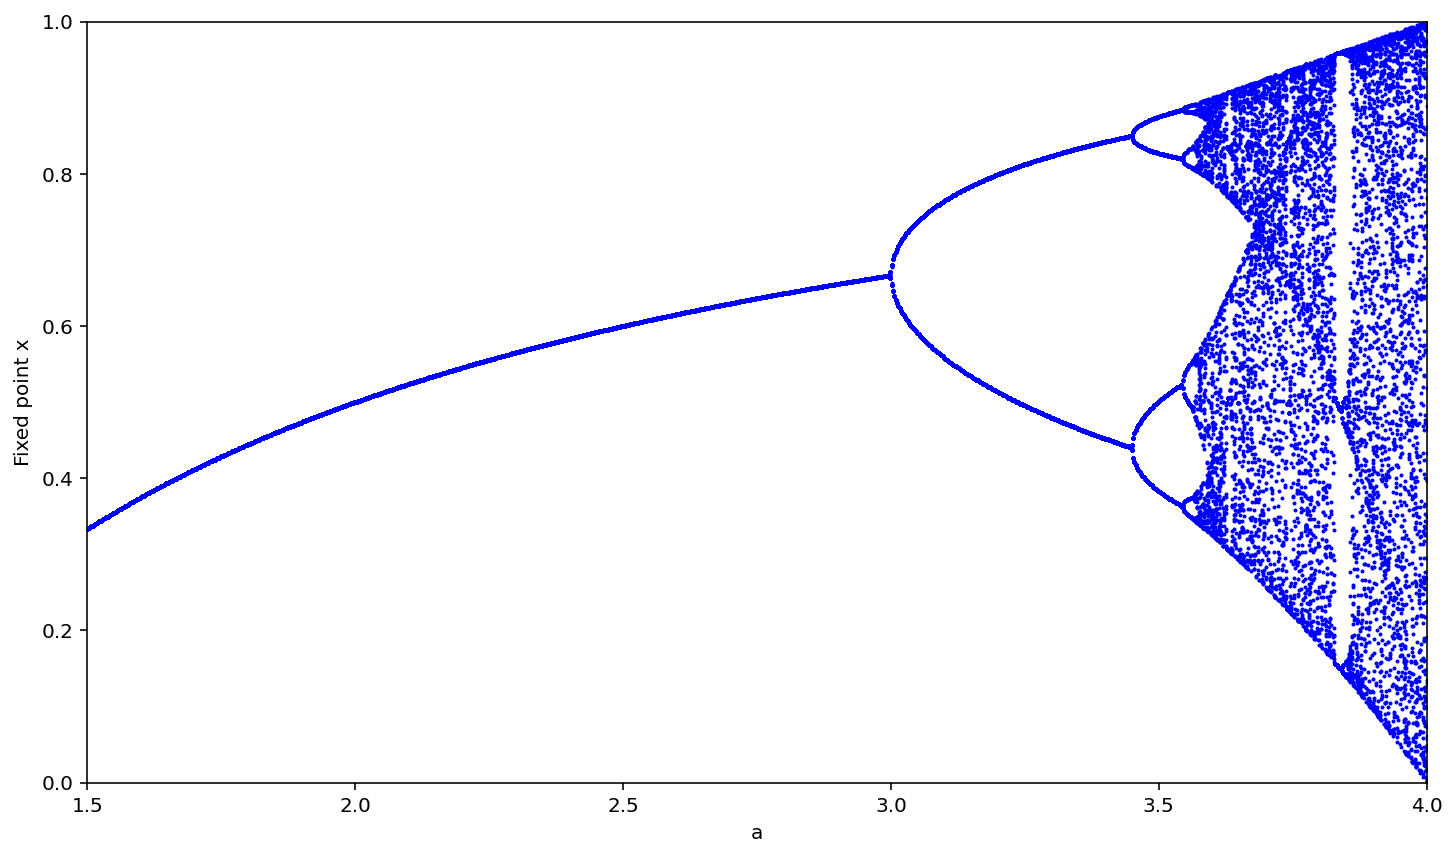

In [80]:
#initialize variables
aInit = 1.5
aFinal = 4.0
aIterations = 1000
xIterations = 50

#generate temporary values for a and x values
aValues = np.linspace(aInit, aFinal, aIterations)
xValues = np.zeros((aIterations, xIterations))

#loop through all a values 
for n, a in enumerate(aValues):
    #loop through xIterations
    for k in range(xIterations):
        #generate random uniform variable
        xInitial = np.random.uniform()
        #loop through aIterations and calculate convergence variable
        for i in range(aIterations):
            #logistic map
            xNextIteration = a*xInitial*(1-xInitial)
            xInitial = xNextIteration
        #inserting x value into x values
        xValues[n,k] = xInitial

#flatten values so they can be plotted on the graph
aValues = np.repeat(aValues, xIterations)
xValues = xValues.reshape(-1)

#set plot up for scatter graph
plt.scatter(aValues, xValues, s=1, color='blue')
plt.xlim(aInit,aFinal)
plt.ylim(0,1)
plt.xlabel('a')
plt.ylabel('Fixed point x')
plt.show()

c) **Repeat the code of b) below, but now make a scatter plot of $x^*$ for $1000$ equally-spaced values of $a$ in the interval [3,4], and a final plot for $a$ in the interval [3.5,3.8].** [2 mark]



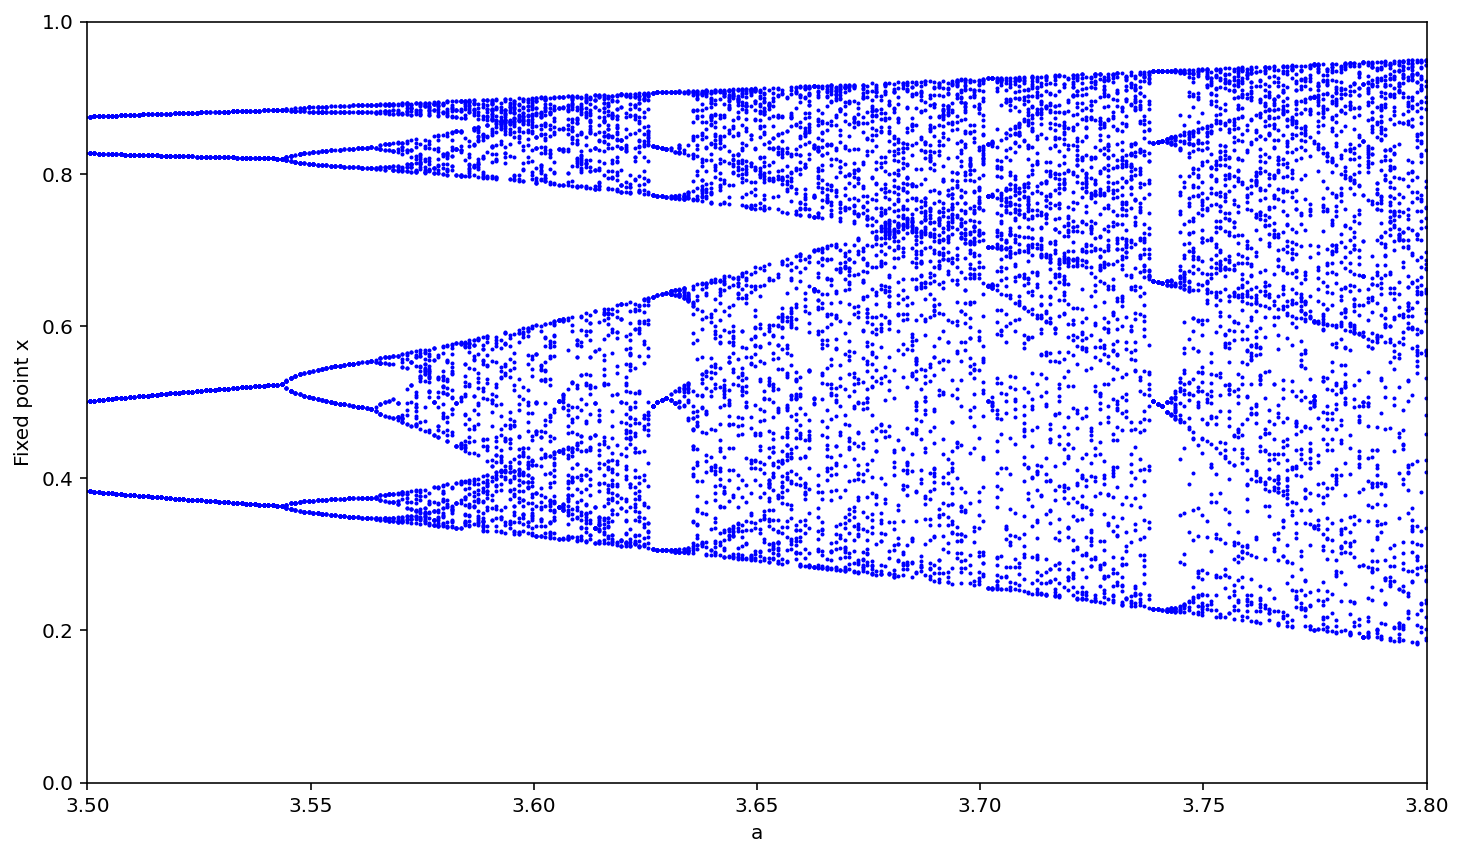

In [81]:
#initialize variables
aInit = 3.0
aFinal = 4.0
aIterations = 1000
xIterations = 50

#generate temporary values for a and x values
aValues = np.linspace(aInit, aFinal, aIterations)
xValues = np.zeros((aIterations, xIterations))

#loop through all a values 
for n, a in enumerate(aValues):
    #loop through xIterations
    for k in range(xIterations):
        #generate random uniform variable
        xInitial = np.random.uniform()
        #loop through aIterations and calculate convergence variable
        for i in range(aIterations):
            #logistic map
            xNextIteration = a*xInitial*(1-xInitial)
            xInitial = xNextIteration
        #inserting x value into x values
        xValues[n,k] = xInitial

#flatten values so they can be plotted on the graph
aValues = np.repeat(aValues, xIterations)
xValues = xValues.reshape(-1)

#set plot up for scatter graph
plt.scatter(aValues, xValues, s=1, color='blue')
plt.xlim(3.5,3.8)
plt.ylim(0,1)
plt.xlabel('a')
plt.ylabel('Fixed point x')
plt.show()

d) **Discuss the results obtained in a Markdown cell. For which values of $a$ do you obtain more than one fix point? Discuss the observed trend as $a$ is increased, and the consequence of the accumulation of fix points for the stability of a growing population. Why are the long-time trends of this sequence so different to the previous question.** [2 marks]



In [0]:
#as a increases there is more fixed points, as the value of a increases there is a larger quantity of fixed point as seen in the denisty of the shape above.


## Problem 3: Projectile motion

One of the big challenges in mathematical physics is the solution to differential equations, such as Newtons equations. In this problem, we aim to simulate the motion of a projectile under the force of gravity. While simple 'free' projectiles like this can be solved analytically (with the 'constant acceleration' equations), we are going to instead use the Euler method to numerically integrate these equations in time to follow the trajectory of the projectile, and so these analytic constant acceleration equations should *not* be used.

In order to do this, we note that we can decouple the $x$ (horizontal) and $y$ (vertical) motion. We therefore aim to end up with two arrays for the $x$-coordinates and $y$-coordinates for each time step that we consider (as well as another set of arrays for the components of the velocity). Finally, to solve differential equations, we will need to specify an initial condition, i.e. the initial $x$ and $y$ position for the projectile, as well as the initial velocity in each direction. Considering the propagation in the $y$-direction (the $x$ direction is simple, as there is no acceleration and the velocity is therefore constant), we can write the expression for the propagation of the coupled $y$-position and $y$-velocity of the particle as

$\dot{y}(t + \Delta t) = \dot{y}(t) - \Delta t \times g$

$y(t + \Delta t) = y(t) + \Delta t \times \dot{y}(t)$

With these two equations, we can predict  the position and velocity of the particle at the next time point, from knowledge of the position and velocity at the previous time point.

a) **Initialise variables denoting the timestep for the integration, `dt`, the acceleration due to gravity, `g=9.8`ms$^{-2}$, and the maximum time to integrate, `t_max`. Calculate the number of timesteps required simulate this maximum time, and initialize numpy arrays to hold the $x$- and $y$- positions and velocities for each time step. It will also be worth initializing variables to store the initial speed, height and angle of the trajectory rather than hard coding them, so that these can be simply changed later on.**

**Initialize the projectile as starting at ground level, and fired at a speed of 100ms$^{-1}$ at an angle of 30$^{\circ}$ above ground level, choosing `dt=0.01` seconds. Print out the maximum height above ground level that the projectile reaches, the maximum distance the projectile travels in the x-direction before it hits the ground, and the time that the projectile travels (Note that while these values can be obtained analytically from constant acceleration equations, they should instead be found from the simulated dynamics of the Euler propagation).** [10 marks]



In [13]:
#Initialise initial variables
initialVelocity = 100.0
g = 9.8
theta = np.radians(30.0)
initialHeight = 0.0
initialDistance = 0.0
dt = 0.01

#t_max was calculated through suvat equations of motions as 10.20408163
t_max = 10.20408163
stepCount = int(t_max/dt)+1

#Initialise x and y position numpy arrays
x = np.zeros(stepCount)
y = np.zeros(stepCount)
x[0] = initialDistance
y[0] = initialHeight

#Intialise x amd y velocity numpy arrays
vx = np.zeros(stepCount)
vy = np.zeros(stepCount)
vx[0] = initialVelocity * math.cos(theta)
vy[0] = initialVelocity * math.sin(theta)

#set t to 0
t = 0

#loop through equations of motions at each interval 
for i in range (1, stepCount):
    vx[i] = vx[i-1]
    x[i] = x[i-1] + vx[i]*dt

    vy[i] = vy[i-1] - g*dt
    y[i] = y[i-1] + vy[i]*dt

    t = t + dt
    
    #once y falls belows 0, break out of the loop
    if y[i] < 0:
        break

#find max height and distance in array of corresponding height and distance
maxHeight = np.max(y)
maxDistance =np.max(x)

#output variables
print("Maximum height:", maxHeight)
print("Maximum distance:", maxDistance)
print("Time of flight:", t , "Thereotical Time " , t_max)
print("stepCount", stepCount)


Maximum height: 127.30110000000104
Maximum distance: 883.3459118601148
Time of flight: 10.199999999999827 Thereotical Time  10.20408163
stepCount 1021


b) **In the code cell below, copy the code from part a) and plot the trajectory as $x$- against $y$-position for the projectile until it reaches the ground. Include axes labels.** [3 marks]

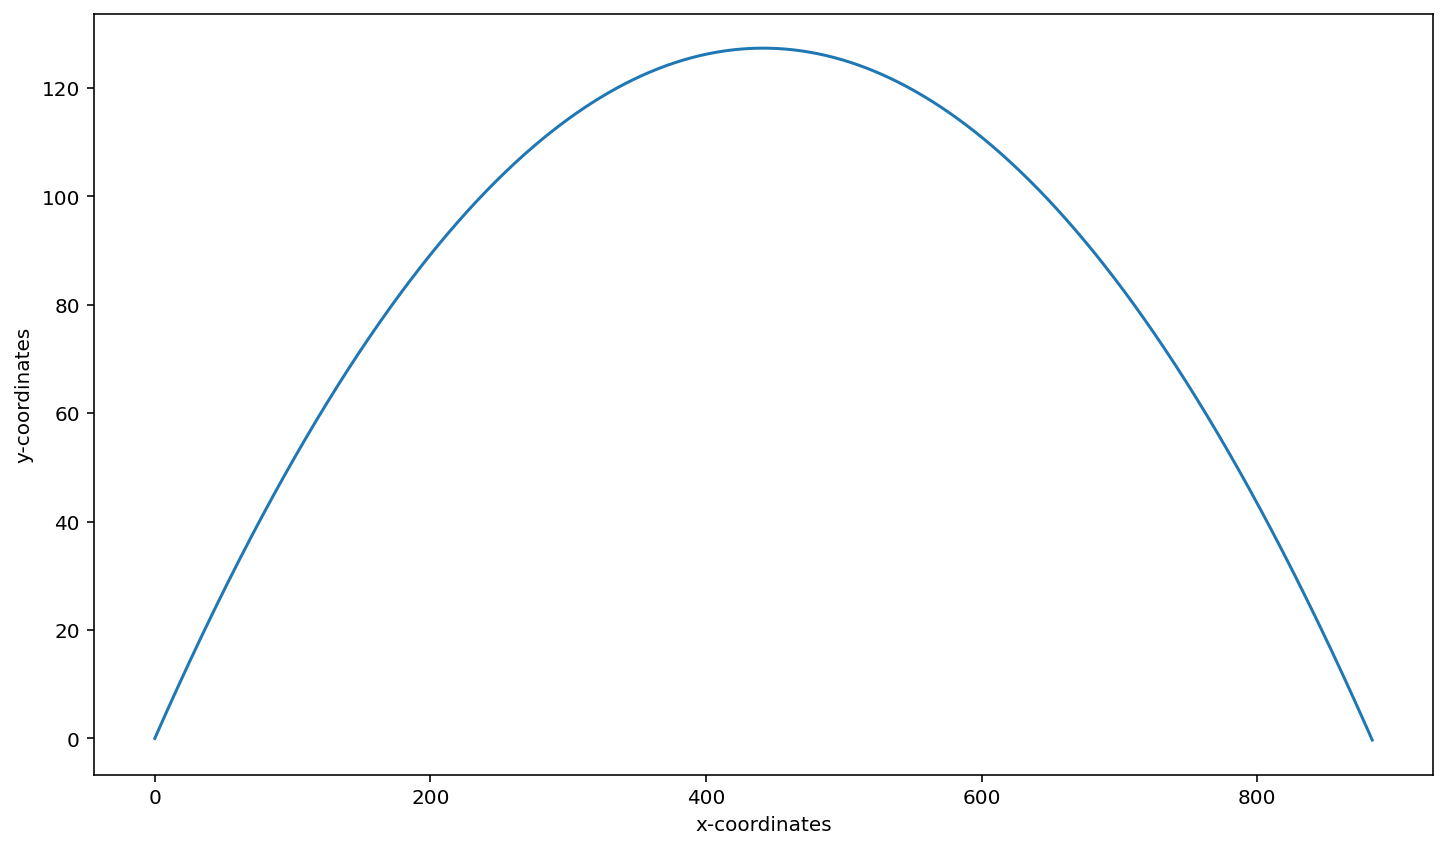

In [19]:
#Initialise initial variables
initialVelocity = 100.0
g = 9.8
theta = np.radians(30.0)
initialHeight = 0.0
initialDistance = 0.0
dt = 0.01

#t_max was calculated through suvat equations of motions as 10.20408163
t_max = 10.20408163
stepCount = int(t_max/dt)+1

#Initialise x and y position numpy arrays
x = np.zeros(stepCount)
y = np.zeros(stepCount)
x[0] = initialDistance
y[0] = initialHeight

#Intialise x amd y velocity numpy arrays
vx = np.zeros(stepCount)
vy = np.zeros(stepCount)
vx[0] = initialVelocity * math.cos(theta)
vy[0] = initialVelocity * math.sin(theta)

#set t to 0
t = 0

#loop through equations of motions at each interval 
for i in range (1, stepCount):
    vx[i] = vx[i-1]
    x[i] = x[i-1] + vx[i]*dt

    vy[i] = vy[i-1] - g*dt
    y[i] = y[i-1] + vy[i]*dt

    t = t + dt
    
    #once y falls belows 0, break out of the loop
    if y[i] < 0:
        break
#plotting coordiantes y against x
plt.plot(x,y)
plt.xlabel("x-coordinates")
plt.ylabel("y-coordinates")
plt.show()


c) The total energy of the projectile at each point in time can be calculated as the sum of its kinetic and potential energy. Find the energy of the projectile (assuming a mass of 10kg) at each point in time in another array, and create a labelled plot of it as a function of time.

**In a text/markdown cell underneath, discuss what this plot is showing, and discuss what it should look like for the exact propagation of the projectile. Describe how the plot changes as the timestep, $\Delta t$ is changed, and why. What is the fundamental approximation made in the numerical solution we have implemented?** [9 marks]



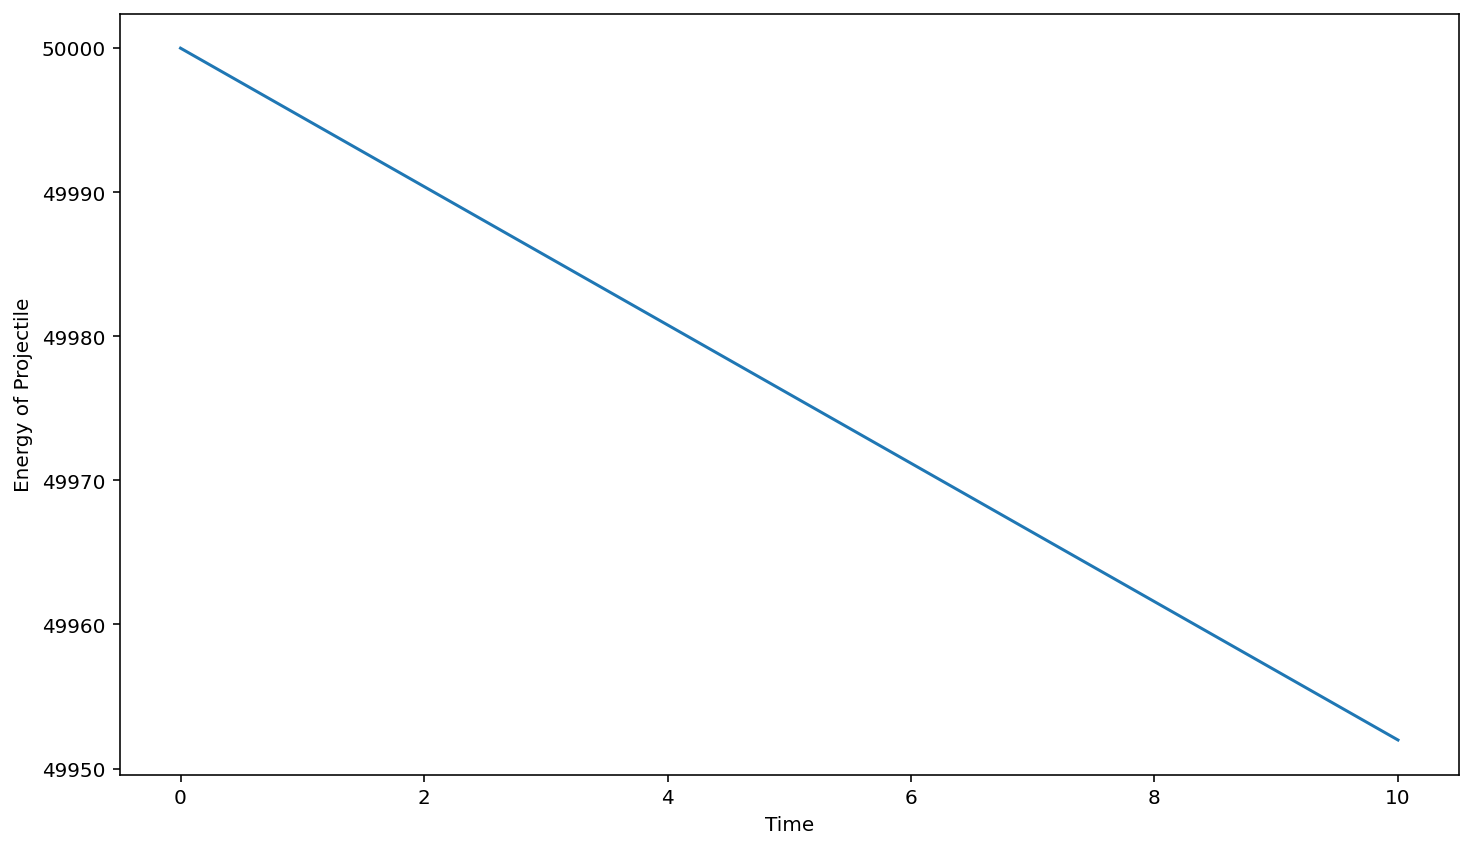

In [37]:
#Initialise initial variables
initialVelocity = 100.0
g = 9.8
theta = np.radians(30.0)
initialHeight = 0.0
initialDistance = 0.0
dt = 0.01
mass = 10.0

#t_max was calculated through suvat equations of motions as 10.20408163
#t_max = 10.20408163
t_max = 10
stepCount = int(t_max/dt)+1

#Initialise x and y position numpy arrays
x = np.zeros(stepCount)
y = np.zeros(stepCount)
x[0] = initialDistance
y[0] = initialHeight

#Intialise x amd y velocity numpy arrays
vx = np.zeros(stepCount)
vy = np.zeros(stepCount)
vx[0] = initialVelocity * math.cos(theta)
vy[0] = initialVelocity * math.sin(theta)

#initialize numpy array to hold energy at each point
energyOfProjectile = np.zeros(stepCount)

#set first value of array
energyOfProjectile[0] = 0.5 * mass * initialVelocity**2

#set up array for time at each interval
fot = np.zeros(stepCount)
t = 0
fot[0] = t

#loop through equations of motions at each interval 
for i in range (1, stepCount):
    vx[i] = vx[i-1]
    x[i] = x[i-1] + vx[i]*dt

    vy[i] = vy[i-1] - g*dt
    y[i] = y[i-1] + vy[i]*dt

    #equations for caluclating kinetic, potential and total energy
    velocity = math.sqrt(pow(vx[i],2) + pow(vy[i],2))
    kineticEnergy = 0.5 * mass * velocity**2
    potentialEnergy = mass * g * y[i]
    totalEnergy = kineticEnergy + potentialEnergy
    energyOfProjectile[i] = totalEnergy
    
    #once y falls belows 0, break out of the loop
    if y[i] <0:
        break

    #inserting time into the time array at each interval
    t = t + dt
    fot[i] = t
    
#plotting graph
plt.plot(fot,energyOfProjectile)
plt.xlabel("Time")
plt.ylabel("Energy of Projectile")
plt.show()

**Describe how the plot changes as the timestep,** $\Delta t$ **is changed, and why. What is the fundamental approximation made in the numerical solution we have implemented?** 

For total energy where it's equal to the summation of kinetic and potential energy, the graph should be a horizontal line as it is constant. Theoretically this is true because there is energy conservation, as well as there are no frictional forces opposing it. 

The plot of the energy of the projectile changes as the timestep is changed. A smaller timestep is more accurate but takes longer to compute, while a larger timestep is faster but may introduce errors. The numerical solution approximates the acceleration of the projectile as constant over small time intervals, but this is only holds if external forces are also constant over small time intervals. If they are not, the solution may be inaccurate.
